# Sesión 14
> Por Christian Rubio Montiel (CRM)
Implementación por Josue Río Campos Becerra, Moisés Borjan Ramírez, Oscar David Domínguez Dávila, Luis Ramos Guerrero y Kevin Martin Rivera Castro y CRM.

En esta sesión se da otra solución al problema de ordenación mediante el algoritmo Radix Sort asumiendo información extra y se introduce el concepto de complejidad computacional (P, NP, NP-Completo, NP-Hard).

<a id='indice'></a>
### Índice
---
1. **[Radix Sort](#radix)**
2. **[Experimentación](#experimentacion)**
3. **[Complejidad computacional](#complejidad)**
4. **[Referencias](#referencias)**
---

<a id='radix'></a>
## 1. RADIX SORT

Radix Sort es un algoritmo de ordenamiento que asume que las entradas son naturales y usa información sobre el número de dígitos de los números dados, por lo que dependerá de la base en la que estén tales números. Empieza ordenando los digítos de las unidades mediante un algoritmo estable (usaremos Counting Sort), continúa con las decenas y así hasta el $d$-ésimo digito del número más grande. Su complejidad depende de $d$ y del algoritmo empleado como subrutina ($\theta(n+k)$ en el caso de Counting Sort). Bajo ciertas hipótesis el algoritmo será lineal.


La entrada del algoritmo es un arreglo $A$ de $n$ elementos cuyas entradas son naturales y cada elemento de $A$ tiene a lo más $d$ dígitos. 

La salida devuélve el arreglo $A$ de forma ordenada.

*RADIX-SORT($A$,$d$)*
1. **for** $i=1$ to $d$ **do**
2. $\hspace{0.5cm}$ Use un algoritmo estable para ordenar el digito $i$

Para ver que el algoritmo es correcto, consideremos las entradas $A[j]=x_d...x_2x_1$ y la entrada $A[l]=y_d...y_2y_1$ (con $j\not = l$). Si $A[j]$ y $A[l]$ no coinciden en ningún dígito, entonces en la $d$-ésima iteración, obtenemos que $A[j]$ y $A[l]$ quedan ordenados. Si no coinciden en los primeros $k-1\geq 0$ dígitos, entonces en la $k$-ésima iteración quedan ordenados. En la siguiente iteración, la $(k+1)$-ésima iteración, los elementos no se intercambian ya que la subrutina es estable. Entonces el algoritmo es correcto.

La complejidad del algoritmo es claramente $\theta(d(n+k))$.

In [1]:
digits(0123, pad = 4)

4-element Vector{Int64}:
 3
 2
 1
 0

In [2]:
function COUNTING_SORT_RS(A,k,d,dig)
    B = vec(zeros(Int,length(A)))
    k = k-1
    C = vec(zeros(Int,k+1))
        
    for j in 1:length(A)
        di = digits(A[j],pad = d)[dig]
        C[di+1] = C[di+1]+1
        
    end
    for i in 2:k+1
        C[i] = C[i] + C[i-1]
    end
    for j in length(A):-1:1
        di = digits(A[j],pad = d)[dig]
        B[C[di+1]] = A[j]
        C[di+1] = C[di+1]-1
    end
    return B
end

COUNTING_SORT_RS (generic function with 1 method)

In [3]:
function RADIX_SORT(A,k,d)
    for i in 1:d
        A = COUNTING_SORT_RS(A,k,d,i)
    end
    return A
end

RADIX_SORT (generic function with 1 method)

In [4]:
A = [329,457,657,839,436,720,55];

In [5]:
RADIX_SORT(A,10,3)

7-element Vector{Int64}:
  55
 329
 436
 457
 657
 720
 839

Regresar al **[Índice](#indice)**.

<a id='experimentacion'></a>
## 2. Experimentación en el tiempo de ejecución

Vamos a realizar 16 ejecuciones del algoritmo para entradas Aj de tamaño 100000j con entradas aleatorias con $j\in\{1,\dots,16\}$.

Graficaremos los puntos $(n,time)$ donde $n$ corresponde al tamaño del arreglo y para fines prácticos.

In [6]:
using Plots

In [7]:
y = []
for j in 1:16
    Aj = rand(1:1000,1000000*j)
push!(y,@elapsed RADIX_SORT(Aj,10,3))
println(length(Aj)," ",y[j])
end

1000000 0.605717752
2000000 1.063953809
3000000 1.578961417
4000000 2.230470296
5000000 2.632002653
6000000 3.501650464
7000000 4.124207968
8000000 4.907350928
9000000 5.231974795
10000000 5.851121362
11000000 5.834425151
12000000 6.464652109
13000000 7.014558978
14000000 7.966390786
15000000 7.872471324
16000000 10.969437491


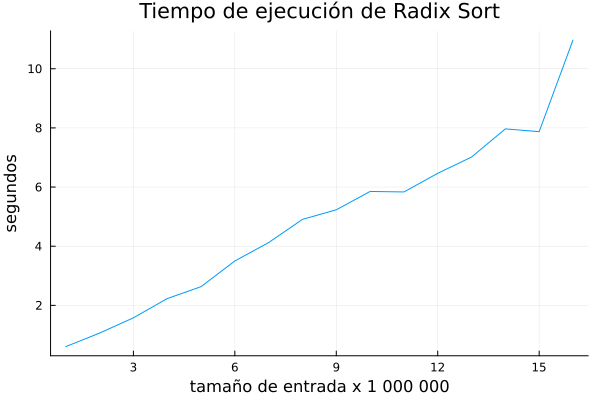

In [8]:
x = range(1, 16, length = 16)
plot(x, y, legend = false)
xaxis!("tamaño de entrada x 1 000 000")
yaxis!("segundos")
title!("Tiempo de ejecución de Radix Sort")

De acuerdo a nuestro análisis, el tiempo de Radix Sort, es lineal, así que ahora ajustaremos una curva lineal vía mínimos cuadrados (en color rojo) y la dibujaremos encima de la curva azul, ver [$[1]$](#referencias).

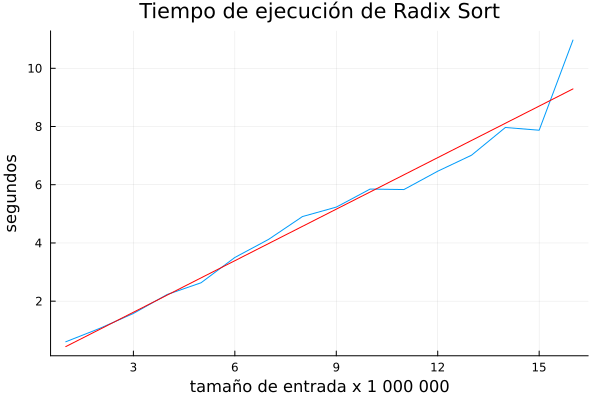

In [9]:
M = zeros(Int64, 2, 2)
M[1, 1] = 16
M[1, 2] = sum(x)
M[2, 1] = sum(x)
M[2, 2] = sum(x .^ 2)
S=M^(-1)*[sum(y), sum(y.*x)]

P(x) =  S[1]+S[2]*x

w = range(1, 16, length = 1000)
z = P.(w)
plot!(w, z, color = :red)

Regresar al **[Índice](#indice)**.

<a id='complejidad'></a>
## 3. Complejidad computacional

El tiempo de ejecución de un algoritmo es una función $T(n)=O(f(n))$. En los ejemplos vistos, $f(n)$ ha sido polinomial, esto es, $f(n)=\theta(n^k)$ para un $k\in \mathbb{N}$. En general, la función $f(n)$ podría ser cualquiera, como una exponencial o de mayor orden.

El tiempo de ejecución se basa en el modelo considerado. En nuestro caso nos basamos en el modelo RAM, el cual sigue los principios de una máquina de Turing determinista.

Dado un *problema de desición* (responde a una pregunta como **falso** o **verdadero**) se dice que es un problema en la *clase P* si existe un algoritmo correcto que lo resuelve cuyo tiempo de ejecución es polinomial.

Para ver que un *problema de optimización* (de maximización o minimización) pertenece a la clase P, se tiene que adaptar a un problema de desición.

En una máquina de Turing determinista, el cabezal tiene una lectura de $0$ o $1$ bien definido. Las ejecuciones las podemos pensar como una trayectoria dirigida que induce un orden total (con un inicio y un final).

En una máquina de *Turing no determinista*, se distingue de una máquina de Turing determinista en la posible lectura del cabezal, que la podemos pensar como una función de probabilidad donde el $0$ y el $1$ tienen una probabiliad del 0.5, por ejemplo, a lo que se refiere como dos estados posibles. Las ejecuciones las podemos pensar como un árbol binario completo con un inicio (en la raíz) y posibles finales (las hojas, donde cada una tiene cierta probabilidad).

Ambas máquinas resuelven los problemas de desición de manera equivalente, y ambas máquinas se pueden modelar para la generacion de algoritmos, sin embargo, su tiempo de ejecución no tiene por qué ser igual. Se dice que un problema está en la *clase NP* si existe un algoritmo correcto modelado en una máquina de Turing no determinista, que resuelve el problema en un tiempo de ejecución polinomial.

Una definición equivalente de un problema en la clase NP es si dada una posible solución, esta se puede verificar en tiempo polinomial en una máquina de Turing determinista, a lo que se le llama certificar. En nuestro diagrama de árbol correspondería escencialmente a una ruta de la raíz a una hoja (la posible solución).

Dos videos al respecto, [Video 1](https://youtu.be/UR2oDYZ-Sao) y [Video 2](https://youtu.be/d9ViJJnRCF4).

La clase P está contenidad en la clase NP. En 1971, se halló un problema en la clase NP tal que si este se demuéstra que está en la clase P, entonces ambas clases son equivalentes. El problema es el llamado **Problema de satisfacibilidad Booleana** cuya clase se denomina *NP-completo*.

*Sea $f$ una función Booleana de $n\geq 3$ variables. ¿Existe un elemento en el dominio tal que al valuarlo en $f$ obtenemos 1?*

Aquí otro video sobre otro problema NP-completo [video](https://youtu.be/WOZ4wDt-iYA).

Determinar si una gráfica es Euleriana es un problema P. Determinar si una gráfica es Hamiltoniana es un problema NP-completo.

Dados dos problemas de desición, si uno de ellos se puede solucionar mediante un algoritmo (determinista) polinomial y se puede llevar al otro (**reducir**) mediante un algoritmo (determinista) polinomial, decimos que están en la clase P.

Dados dos problemas de desición, si uno de ellos se puede solucionar mediante un algoritmo no determinista polinomial y se puede llevar al otro (**reducir**) mediante un algoritmo (determinista) polinomial, decimos que  están en la clase NP.

Este tipo de reducciones se denominan reducciones de Karp.

Ahora bien, dado un problemas de desición NP-completo, si este se puede reducir a otro problema (no necesariamente de desición) mediante un algoritmo (determinista) polinomial, decimos que son **equivalentes** y que están en la clase NP-difícil.

Este tipo de reducciones se denominan reducciones de Turing.

El **Problema de la suma de subconjuntos** es problema en la clase NP-difícil.

*Dado un conjunto $S$ de enteros, ¿existe un subconjunto no vacío $A$ de $S$ cuyos elementos sumen cero?*

La variante al considerar a $S$ como conjunto de naturales es un problema NP-completo.

Aquí otro video sobre otro problema NP-difícil [video](https://youtu.be/E3yHtJSDNNY).

Este tipo de clases son las estudiadas en complejidad computacional.

También hay que mencionar que hay problemas de desición tal que no se les puede construir un algoritmo correcto, a estos problemas se les llama **Problemas indecidibles**.

Por ejemplo, el *Problema de la parada* es aquel que pregunta si dado un programa cualesquiera, se detendrá o no, una vez que ha sido ejecutado.

Una página para obtener información acerca de complejidad computaciones es [liga](https://www.wolframalpha.com/examples/science-and-technology/computational-sciences/computational-complexity).

Regresar al **[Índice](#indice)**.

<a id='referencias'></a>
## 4. Referencias

$[1]$ Burden, R. L., Faires, J. D., Rurden, A. (2015). **Numerical analysis**. Cengage Learning, 10E.

$[2]$ Cormen, T. H., Leiserson, C. E., Rivest, R. L. y Stein C. (2022). **Introduction to algorithms**. MIT Press, 4E.